# US Coronavirus Growth

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [83]:
df = pd.read_csv('data/covid_19_data.csv',parse_dates=['Last Update'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

In [135]:
df2 = df.groupby(["Date", "Country"])[['Province/State','Date', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
US_df = df2[df2['Country']=='US']

# manually add last few days
US_df = US_df.append({'Date': '03/16/20', 'Country':'US', 'Confirmed':4661, 
              'Deaths':85, 'Recovered':17}, ignore_index=True)

# get total confirmed growth rate
US_df['Confirmed Growth']= US_df['Confirmed'] / US_df['Confirmed'].shift()
# get new daily infections
US_df['Infections'] = US_df['Confirmed'].diff()
# find growth rate: infections(n)/infections(n-1)
US_df['Acceleration']= US_df['Infections'] / US_df['Infections'].shift()

US_df['Mortality']= US_df['Deaths'] / US_df['Confirmed']



In [136]:
# clean data
US_df = US_df.fillna(0)
US_df = US_df.replace([np.inf, -np.inf], 1)

# get rolling average of Confirmed growth rate -- helps to smoothe data from outlier days
US_df['Conf Growth Roll Avg. 7']= US_df['Confirmed Growth'].rolling(7, win_type='triang').mean()
# get rolling average of new infection growth rate -- helps to smoothe data from outlier days
US_df['Roll. Avg. 5']= US_df['Acceleration'].rolling(5, win_type='triang').mean()

In [137]:
def get_double_rate(df, column):
    double_day_rate = []
    for i in range(len(df[column])):
        for j in range(len(df[column])):
            if df[column].iloc[j] >= 2*df[column].iloc[i]:
                double_day_rate.append(j-i)
                break
        else:
            double_day_rate.append(df['Confirmed'].iloc[i]/df['Infections'].iloc[i])
    return double_day_rate
    

US_df['Days to Double'] = get_double_rate(US_df, 'Confirmed')

In [138]:
US_df.iloc[-30:]

,Date,Country,Confirmed,Deaths,Recovered,Confirmed Growth,Infections,Acceleration,Mortality,Conf Growth Roll Avg. 7,Roll. Avg. 5,Days to Double
25,02/16/2020,US,15.0,0.0,3.0,1.000000,0.0,0.000000,0.000000,1.048878,0.222222,5.000000
26,02/17/2020,US,15.0,0.0,3.0,1.000000,0.0,0.000000,0.000000,1.034054,0.111111,4.000000
27,02/18/2020,US,15.0,0.0,3.0,1.000000,0.0,0.000000,0.000000,1.019231,0.000000,3.000000
28,02/19/2020,US,15.0,0.0,3.0,1.000000,0.0,0.000000,0.000000,1.009615,0.000000,2.000000
29,02/20/2020,US,15.0,0.0,3.0,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000
30,02/21/2020,US,35.0,0.0,5.0,2.333333,20.0,1.000000,0.000000,1.083333,0.111111,8.000000
31,02/22/2020,US,35.0,0.0,5.0,1.000000,0.0,0.000000,0.000000,1.166667,0.222222,7.000000
32,02/23/2020,US,35.0,0.0,5.0,1.000000,0.0,0.000000,0.000000,1.250000,0.333333,6.000000
33,02/24/2020,US,53.0,0.0,5.0,1.514286,18.0,1.000000,0.000000,1.365476,0.333333,8.000000
34,02/25/2020,US,53.0,0.0,6.0,1.000000,0.0,0.000000,0.000000,1.314286,0.333333,7.000000


In [139]:
# Total confirmed cases in US over time
fig = px.line(US_df, x='Date', y='Confirmed')
fig.show()

In [140]:
# Infection Growth rate rolling avg. over previous 7 days -- 
# Anything above 1 is exponential growth
# Instability more likely a result of testing deficiency 
fig = px.line(US_df[-15:], x='Date', y='Roll. Avg. 5')
fig.show()

The above is the rate of growth of new daily infections. This is roughly the acceleration of infections (the 2nd order derivative). For the pace of growth to slow this number needs to drop below 1. 

Most machine learning methods (that I'm aware of) will not take into account the efforts to slow the growth of the virus via social awareness and local and federally mandated closures and quarantines.

Here we descibe a growth rate by what we've observed in China/Italy (see China_Italy_Growth_Rate Nb), and how it may differ for the US.

In [144]:
# Best case scenario (not likely) -- mirror Chinese Infection growth rate from similar point
china_growth = [1.3333065376764426,
 1.2865422144485952,
 1.2511838934872888,
 1.2564241885343765,
 1.2255168347255125,
 1.1997351115032031,
 1.1663670954710765,
 1.1317727622226563,
 1.1117267858005517,
 1.0918711884215337,
 1.0752780826511237,
 1.0794496347005742,
 1.0896344300164935,
 1.102989994571699,
 1.1221737839190635,
 1.1058586010066274,
 1.0815323418081313,
 1.0566599737880182,
 1.0288530494654606,
 1.0191965707500845,
 1.0144228333182108,
 1.010913336006789,
 1.008737515056192,
 1.007886533569267,
 1.006492987384166,
 1.0057632125927451,
 1.0053251150551301,
 1.0047967095782733,
 1.0052706648682108,
 1.0052208784453278]

italy_growth = [
 1.3490561579728846,
 1.329581824410518,
 1.28837212074931,
 1.262399727417197,
 1.2468615064244384,
 1.234739394971382,
 1.2380884277338993,
 1.2355056531112592,
 1.2278491673839116,
 1.2031544382074681,
 1.1896305749072589,
 1.1877715443983825,
 1.1848410901079534,
 1.1663670954710765,
 1.1317727622226563,
 1.1117267858005517,
 1.0918711884215337,
 1.0752780826511237,
 1.0794496347005742,
 1.0896344300164935,
 1.102989994571699,
 1.1221737839190635,
 1.1058586010066274,
 1.0815323418081313,
 1.0566599737880182,
 1.0288530494654606,
 1.0191965707500845,
 1.0144228333182108,
 1.010913336006789,
 1.008737515056192,
]


us_realistic = [
 1.3490561579728846,
 1.329581824410518,
 1.29837212074931,
 1.282399727417197,
 1.2768615064244384,
 1.274739394971382,
 1.2580884277338993,
 1.2455056531112592,
 1.2378491673839116,
 1.2231544382074681,
 1.2196305749072589,
 1.2077715443983825,
 1.1848410901079534,
 1.1763670954710765,
 1.1517727622226563,
 1.1317267858005517,
 1.1018711884215337,
 1.0952780826511237,
 1.0894496347005742,
 1.0896344300164935,
 1.10989994571699,
 1.1221737839190635,
 1.1058586010066274,
 1.0815323418081313,
 1.0766599737880182,
 1.0688530494654606,
 1.0491965707500845,
 1.0344228333182108,
 1.020913336006789,
 1.018737515056192,
]

In [120]:
def model_infected(num_days, confirmed_growth, current_infected):
    infected_by_day = []
    for i in range(1,num_days):
        current_infected = current_infected*confirmed_growth[i]
        infected_by_day.append(current_infected)
    return(infected_by_day)


def future_infected(num_days, confirmed_growth, current_infected):
    infected_by_day = []
    for i in range(1,num_days):
        current_infected = current_infected*confirmed_growth
        infected_by_day.append(current_infected)
    return(infected_by_day)

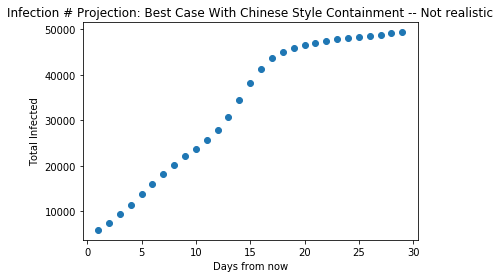

In [122]:
num_days = 30

x = range(1,num_days)

#y = future_infected(num_days, 1.22, US_df['Confirmed'].iloc[-1])
y = model_infected(num_days, china_growth, US_df['Confirmed'].iloc[-1])

plt.xlabel('Days from now') 
plt.ylabel('Total Infected') 

plt.title('Infection # Projection: Best Case With Chinese Style Containment -- Not realistic') 
plt.scatter(x, y) 

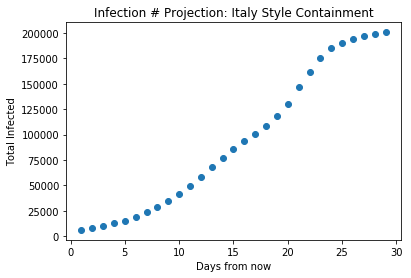

In [134]:
num_days = 30

x = range(1,num_days)

#y = future_infected(num_days, 1.22, US_df['Confirmed'].iloc[-1])
y = model_infected(num_days, italy_growth, US_df['Confirmed'].iloc[-1])

plt.xlabel('Days from now') 
plt.ylabel('Total Infected') 

plt.title('Infection # Projection: Italy Style Containment') 
plt.scatter(x, y) 

The outbreaks in the US are much more dispersed in area than both Italy and China, and containment decisions are being made by local governments, rather than Federal. This will probably result in a less aggressive slowing of the growth rate.

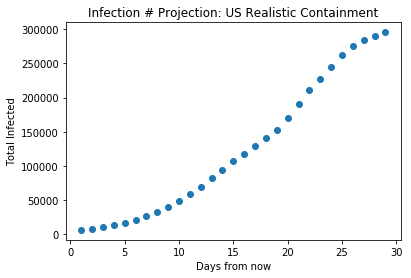

In [145]:
num_days = 30

x = range(1,num_days)

#y = future_infected(num_days, 1.22, US_df['Confirmed'].iloc[-1])
y = model_infected(num_days, us_realistic, US_df['Confirmed'].iloc[-1])

plt.xlabel('Days from now') 
plt.ylabel('Total Infected') 

plt.title('Infection # Projection: US Realistic Containment') 
plt.scatter(x, y) 